In [70]:
from matplotlib import pyplot as plt
from sklearn import datasets,metrics
from sklearn.neighbors import KNeighborsClassifier
from keras.datasets import mnist

In [71]:
(X_img, Y_img),(X_val, Y_val) = mnist.load_data()
print(X_img.shape)

(60000, 28, 28)


In [72]:
# load data
digits = datasets.load_digits()
data_with_labels = list(zip(digits.images,digits.target))
print(digits.images.shape)
print(digits.images[0])

(1797, 8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


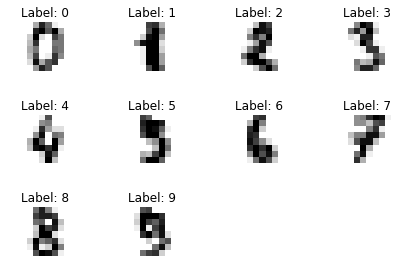

In [73]:
for index,(image,label) in enumerate(data_with_labels[:10]):
  plt.subplot(3,4,index+1)
  plt.axis('off')
  plt.tight_layout()
  plt.imshow(image,cmap=plt.cm.gray_r)
  plt.title('Label: %i' %label)

In [74]:
# convert images (matrixs) to vectors
n = len(digits.images)
data = digits.images.reshape(n, -1)
print(data.shape)

(1797, 64)


In [75]:
# divde trainning and testing
training_volume = int(0.8 * data.shape[0])
test_volume = data.shape[0] - training_volume

In [76]:
# create KNN classifier
k = 1
knn = KNeighborsClassifier(metric = 'minkowski', p=2, n_neighbors=k)
knn.fit(data[:training_volume], digits.target[:training_volume])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [77]:
# expected data
expected = digits.target[training_volume: (training_volume+test_volume)]

# predict data
predicted = knn.predict(data[training_volume: (training_volume+test_volume)])
print(len(predicted))

360


In [78]:
# calculate accuracy average
num_correct=0
for i in range(0,len(expected)):
  if expected[i] == predicted[i]:
    num_correct +=1
   
print("Accuracy: \n%s" % str(float(num_correct / float(len(expected)))))

Accuracy: 
0.9555555555555556
